In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from tqdm import tqdm
from scipy import stats

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


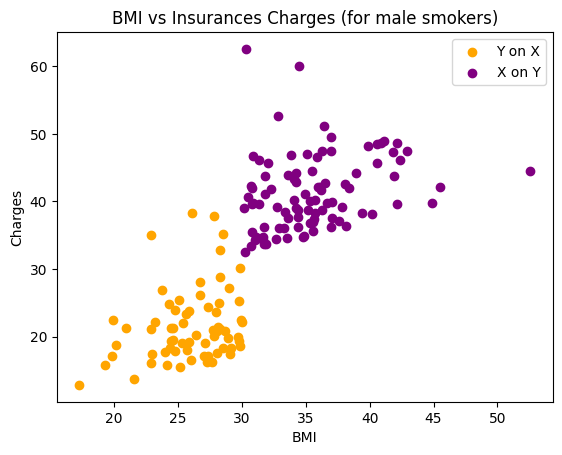

In [3]:
X = np.array(df["bmi"][df['sex'] == 'male'][df['smoker'] == 'yes'])
Y = np.array(df["charges"][df['sex'] == 'male'][df['smoker'] == 'yes'])
Y = Y/1000
Z = []
for i in X:
    if i > 30:
        Z.append(0)
    else:
        Z.append(1)

X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)        

X1 = X[Z == 1]
X2 = X[Z == 0]
Y1 = Y[Z == 1]
Y2 = Y[Z == 0]

plt.figure()
plt.scatter(X1, Y1, c = "orange", label = "Y on X")
plt.scatter(X2, Y2, c = "purple", label = "X on Y")
plt.legend()
plt.title("BMI vs Insurances Charges (for male smokers)")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

## Getting the coefficients for a Simple Quadratic Regression

In [4]:
# Functions in question
def Q_hat_1(a,b,c):
    return (1/len(X))*sum((Y - a*X**2 - b*X - c)**2)

def Q_hat_2(a,b,c):
    return (1/len(X))*sum((X + (b/(2*a) - np.sqrt(b**2 - 4*a*(c - Y))/(2*a)))**2)
  
def Q_hat_1_der_a(a,b,c):
    return (1/len(X))*sum((Y - a*X**2 - b*X - c)*(-2*X**2))

def Q_hat_1_der_b(a,b,c):
    return (1/len(X))*sum((Y - a*X**2 - b*X - c)*(-2*X))

def Q_hat_1_der_c(a,b,c):
    return (1/len(X))*sum((Y - a*X**2 - b*X - c)*(-2))

def Y_args(X,a,b,c):
    return(a*X**2 + b*X + c)

# Now we apply the swap model on the data set 
a,b,c = 1,0,1
n = len(X)
lr = 0.0000001
for i in range(1000):
    try:
        a = a - lr*Q_hat_1_der_a(a,b,c)
        b = b - lr*Q_hat_1_der_b(a,b,c)
        c = c - lr*Q_hat_1_der_c(a,b,c)
    except RuntimeWarning:
        print("error")
        break
    
"""
plt.figure()
plt.scatter(
    X,
    Y,
    c = Z,
    label = 'Observations'
)

plt.scatter(X,Y_args(X,a,b,c),c = "red", label = 'Best Fit Line')
plt.title("BMI vs Insurances Charges (for male smokers)")
plt.legend()
plt.xlabel("BMI")
plt.ylabel("Charges")
"""
#X_ms, Y_ms, Y_org_ms, Z_ms = X,Y_args(X,a,b,c), Y, Z # Storing values for later

'\nplt.figure()\nplt.scatter(\n    X,\n    Y,\n    c = Z,\n    label = \'Observations\'\n)\n\nplt.scatter(X,Y_args(X,a,b,c),c = "red", label = \'Best Fit Line\')\nplt.title("BMI vs Insurances Charges (for male smokers)")\nplt.legend()\nplt.xlabel("BMI")\nplt.ylabel("Charges")\n'

In [5]:
a,b,c

(0.030427504391451907, -0.01652429308325449, 0.9996326272611616)

In [6]:
def grad_a(x, y, a, b, c):
    return (y - a*x**2 - b*x - c)*(-2*x**2)
def grad_b(x, y, a, b, c):
    return (y - a*x**2 - b*x - c)*(-2*x)
def grad_c(x, y, a, b, c):
    return (y - a*x**2 - b*x - c)*(-2)
def swap_grad_a(x, y, a, b, c):
    return 2*(x + b/(2*a) - (b**2 +4*a*y - 4*a*c)**0.5/(2*a))*(-b/a**2 + (b**2 + 4*a*y - 4*a*c)**0.5 / (2*a**2) - (y-c)/(a*(b**2 + 4*a*y - 4*a*c)**0.5))
def swap_grad_b(x, y, a, b, c):
    return 2*(x + b/(2*a) - (b**2 +4*a*y - 4*a*c)**0.5/(2*a))*(1/(2*a) - b/(2*a*(b**2 + 4*a*y - 4*a*c)**0.5))
def swap_grad_c(x, y, a, b, c):
    return 2*(x + b/(2*a) - (b**2 +4*a*y - 4*a*c)**0.5/(2*a))*(2/(b**2 + 4*a*y - 4*a*c)**0.5)

In [7]:
def Swap(X, Y, Z, epochs = 1e5, lr = 1e-7, error = 0.25, ers = 1e-2):
    a = 1
    b = 0
    c = 0
    L = []
    ep = []
    for e in tqdm(range(0, int(epochs))):
        gA = 0
        gB = 0
        gC = 0
        err = 0
        for i in range(0, len(Z)):
            if Z[i] == 1:
                gA += grad_a(X[i], Y[i], a, b, c)
                gB += grad_b(X[i], Y[i], a, b, c)
                gC += grad_c(X[i], Y[i], a, b, c)
            if Z[i] == 0:
                try:
                    gA += swap_grad_a(X[i], Y[i], a, b, c)
                    gB += swap_grad_b(X[i], Y[i], a, b, c)
                    gC += swap_grad_c(X[i], Y[i], a, b, c)
                except:
                    err += 1
        gA /= (len(X) - err)
        gB /= (len(X) - err)
        gC /= (len(X) - err)
        ep.append(e + 1)
        L.append(gA**2 + gB**2 + gC**2)
        if err/len(Z) < error:
            a -= gA * lr
            b -= gB * lr
            c -= gC * lr
        else:
            a -= gA * lr
            b -= gB * lr
            c -= gC * lr
        if gA**2 + gB**2 + gC**2 < ers:
            plt.scatter(ep, L)
            return [a, b, c]
        if e == int(epochs) - 1:
            print(gA**2 + gB**2 + gC**2)
    print("Meh.")
    plt.scatter(ep, L)
    return [a, b, c]

100%|████████████████████████████████| 1000000/1000000 [22:19<00:00, 746.64it/s]


0.2685394915845524
Meh.


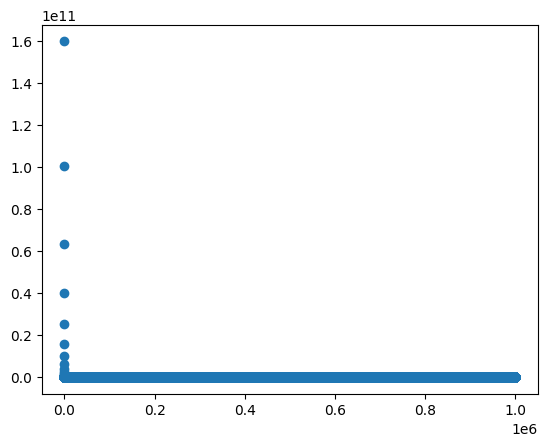

In [8]:
S = Swap(X, Y, Z, epochs = 1e6, lr = 5e-7, ers = 1e-1)

In [9]:
m1, c1, r, p, std_err = stats.linregress(X1, Y1)
m2, c2, _, _, _ = stats.linregress(Y2, X2)
c4 = -c2/m2
m4 = 1/m2
m2, c2, _, _, _ = stats.linregress(X2, Y2)
m3, c3, _, _, _ = stats.linregress(X, Y)

In [10]:
def makeLineSwap(x, y, z, m1, c1, m2, c2):
    Y = []
    for i in range(0, len(z)):
        if z[i] == 1:
            Y.append(m1*x[i] + c1)
        else:
            Y.append(m2*x[i] + c2)
    return x, Y

In [11]:
def makeLine(x, y, m, c):
    Y = []
    for i in range(0, len(x)):
        Y.append(m*x[i] + c)
    return x, Y

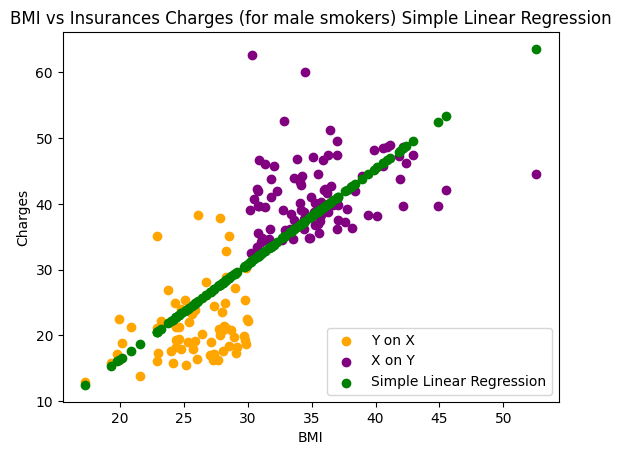

In [34]:
plt.scatter(X1, Y1, label = "Y on X", c = "orange")
plt.scatter(X2, Y2, label = "X on Y", c = "purple")

A, B = makeLine(X, Y, m3, c3)
plt.scatter(A, B, label = "Simple Linear Regression", c = "green")
plt.title("BMI vs Insurances Charges (for male smokers) Simple Linear Regression")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.legend()
plt.show()

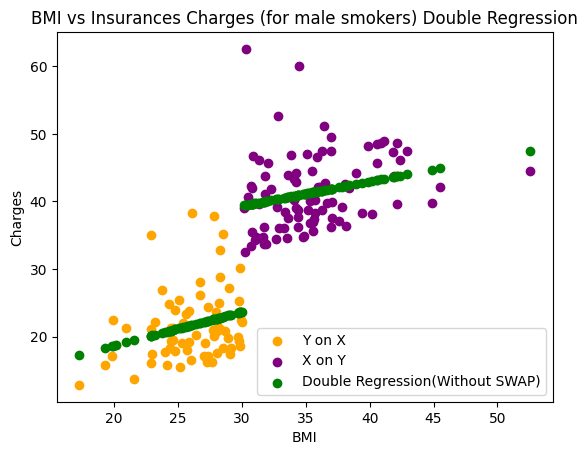

In [33]:
plt.scatter(X1, Y1, label = "Y on X", c = "orange")
plt.scatter(X2, Y2, label = "X on Y", c = "purple")

A, B = makeLineSwap(X, Y, Z, m1, c1, m2, c2)
plt.scatter(A, B, label = "Double Regression(Without SWAP)", c = "green")
plt.title("BMI vs Insurances Charges (for male smokers) Double Regression")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.legend()
plt.show()

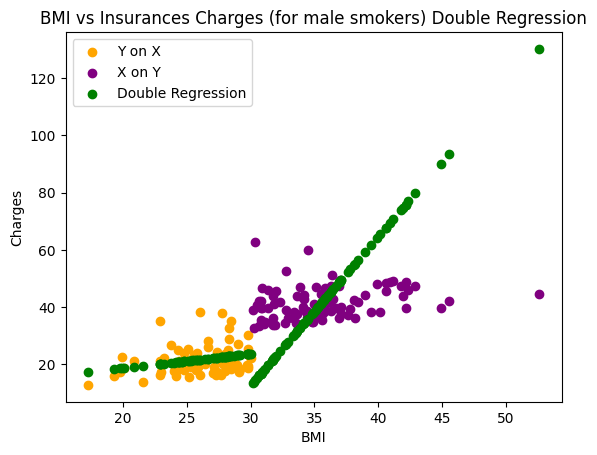

In [12]:
plt.scatter(X1, Y1, label = "Y on X", c = "orange")
plt.scatter(X2, Y2, label = "X on Y", c = "purple")

A, B = makeLineSwap(X, Y, Z, m1, c1, m4, c4)
plt.scatter(A, B, label = "Double Regression", c = "green")
plt.title("BMI vs Insurances Charges (for male smokers) Double Regression")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.legend()
plt.show()

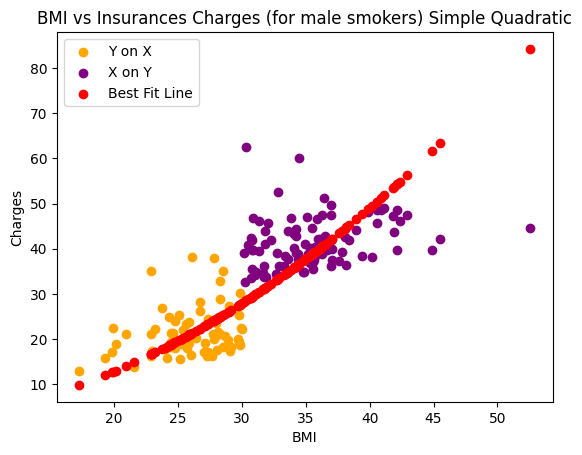

In [14]:
plt.scatter(X1, Y1, label = "Y on X", c = "orange")
plt.scatter(X2, Y2, label = "X on Y", c = "purple")

plt.scatter(X,Y_args(X,a,b,c),c = "red", label = 'Best Fit Line')
plt.title("BMI vs Insurances Charges (for male smokers) Simple Quadratic")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.legend()
plt.show()

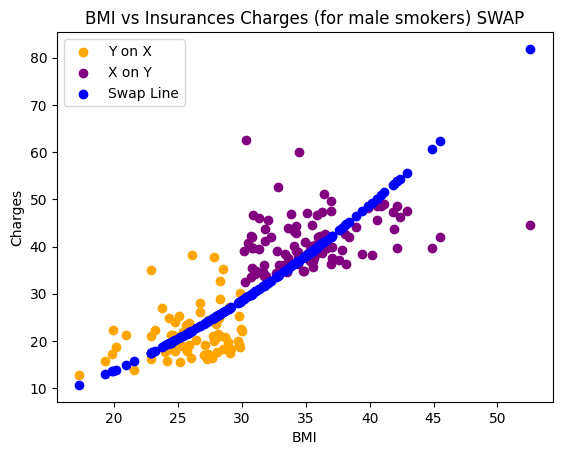

In [15]:
plt.scatter(X1, Y1, label = "Y on X", c = "orange")
plt.scatter(X2, Y2, label = "X on Y", c = "purple")
plt.scatter(X,Y_args(X,S[0],S[1],S[2]),c = "blue", label = 'Swap Line')
plt.title("BMI vs Insurances Charges (for male smokers) SWAP")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.legend()
plt.show()

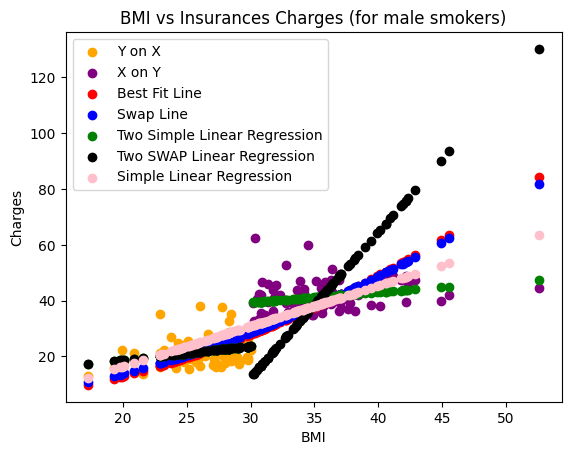

In [26]:
"""
plt.scatter(
    X,
    Y,
    c = Z,
    label = 'Observations'
)"""
plt.scatter(X1, Y1, label = "Y on X", c = "orange")
plt.scatter(X2, Y2, label = "X on Y", c = "purple")

plt.scatter(X,Y_args(X,a,b,c),c = "red", label = 'Best Fit Line')
plt.scatter(X,Y_args(X,S[0],S[1],S[2]),c = "blue", label = 'Swap Line')
A, B = makeLineSwap(X, Y, Z, m1, c1, m2, c2)
plt.scatter(A, B, label = "Two Simple Linear Regression", c = "green")
A, B = makeLineSwap(X, Y, Z, m1, c1, m4, c4)
plt.scatter(A, B, label = "Two SWAP Linear Regression", c = "black")
A, B = makeLine(X, Y, m3, c3)
plt.scatter(A, B, label = "Simple Linear Regression", c = "pink")
plt.title("BMI vs Insurances Charges (for male smokers)")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.legend()
plt.show()

In [17]:
def error(X, Y, Z, a, b, c):
    e = 0
    for i in range(0, len(Z)):
        if Z[i] == 1:
            e += (Y[i] - a*X[i]**2 - b*X[i] - c)**2
        else:
            e += (X[i] + b/(2*a) - ((b**2 - 4*a*c + 4*a*Y[i])**0.5)/(2*a))**2
    return e

In [18]:
e = 0
for i in range(0, len(X1)):
    e += (Y1[i] - m1*X[i] - c1)**2
for i in range(0, len(X2)):
    e += (X2[i] - (Y2[i] - c2)/m2)**2
print("Error with 2 Simple Linear Regressions : " + str(e))

Error with 2 Simple Linear Regressions : 23517.073635955887


In [19]:
e = 0
for i in range(0, len(X1)):
    e += (Y1[i] - m1*X[i] - c1)**2
for i in range(0, len(X2)):
    e += (X2[i] - (Y2[i] - c4)/m4)**2
print("Error with 2 SWAP Linear Regressions : " + str(e))

Error with 2 SWAP Linear Regressions : 4850.3253712304595


In [20]:
e = 0
for i in range(0, len(X1)):
    e += (Y1[i] - m3*X[i] - c3)**2
for i in range(0, len(X2)):
    e += (X2[i] - (Y2[i] - c3)/m3)**2
print("Error with Simple Linear Regression : " + str(e))

Error with Simple Linear Regression : 19100.889068546632


In [21]:
print("Error with Simple Quadratic Regression : " + str(error(X, Y, Z, a, b, c)))

Error with Simple Quadratic Regression : 4076.7171547854573


In [22]:
print("Error with Swap Regression : " + str(error(X, Y, Z, S[0], S[1], S[2])))

Error with Swap Regression : 4084.200145245626
